# Comparing Original LeetCode Solutions to Online Solutions

Leetcode is an ubiquitous platform used by those in the tech industry to prepare for data structures and algorithms problems that may arise during the interview process. In this notebook, we compare a dataset of originally developed Leetcode solutions (solved by myself over the span of a few years) to a dataset of solutions scraped from a set of leetcode.com forum pages, where one forum page is dedicated to each problem. The analysis is done using a series of techniques from Natural Language Processing. An list of the analyses we perform is below:

(Under development)

Ultimately, the goal of this project is to discover my strengths and weaknesses (with regards to data structures and algorithms, but also coding more generally) with a data driven methodology and use these to identify personal development areas.

## Part I: Scraping dataset of online solutions

Leetcode is a dynamic website built using React. For this reason, lightweight scrapers such as requests + beautifulsoup would not suffice. Instead, we use Selenium to scrape our database of solutions. This is done in 3 parts:

1. Scrape a list of all problems and slugs so that we may crawl individual problem pages.
2. For each problem, scrape the links of the top 4 pages of posts with the 'python3' tag on the Solutions forum.
3. Scrape the text for all post links scraped in step 2.

For each problem on leetcode.com, there is an associated forum page that can be visited at the "Solutions" tab highlighted below.
<div>
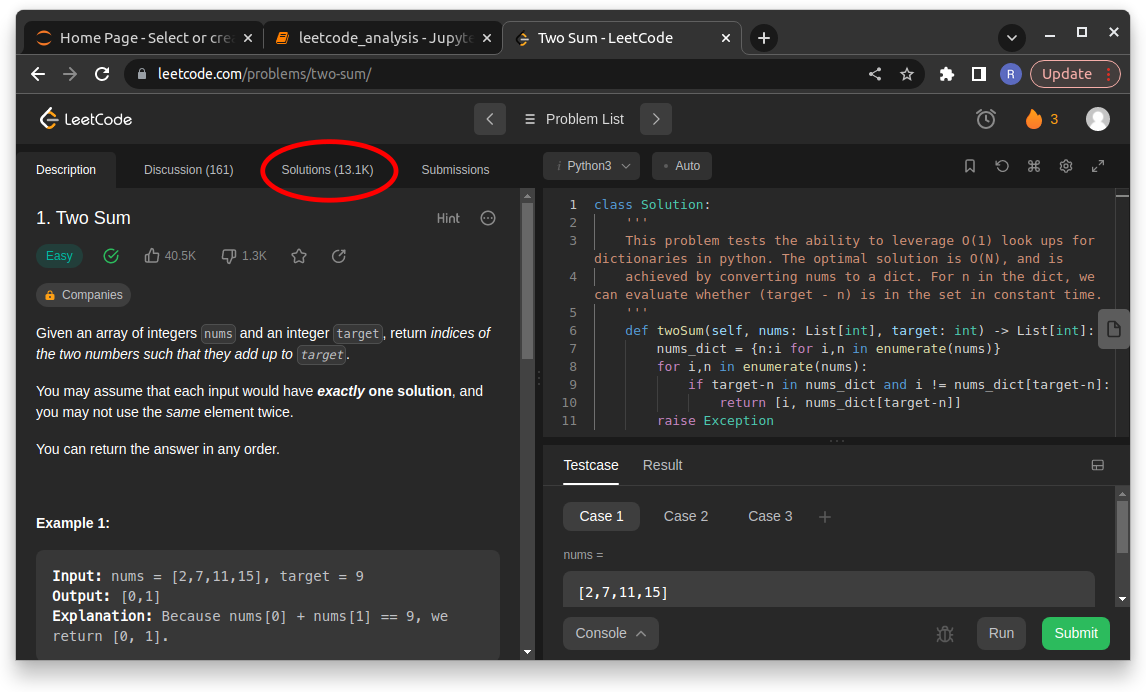
</div>
This links to a forum page which can then be filtered to only show questions / solutions in python3. We find the element containing the list of forum posts:

<div>
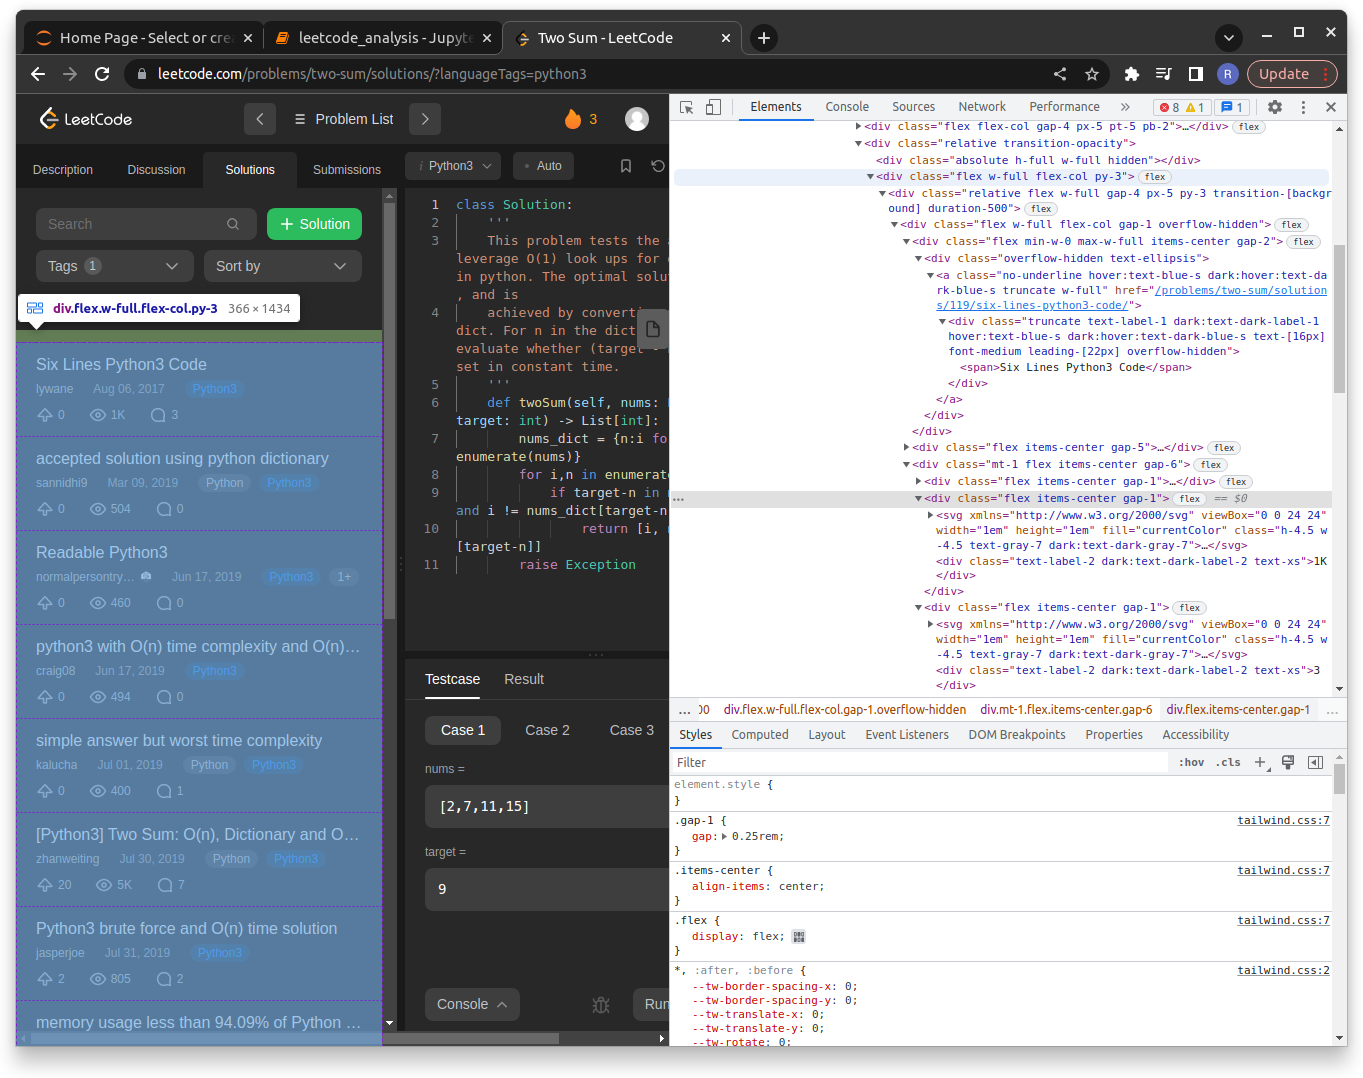
</div>

Also shown in the screenshot above is the structure of all elements in a single post. 

The class of this element containing all posts is saved and posts within are looped over. We are most interested in saving the href that is associated with the title, but retain other information such as the number of upvotes, views, and comments, in case we want to use this information later.

In [108]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

from collections import defaultdict
import pandas as pd
import time

pd.set_option('display.max_colwidth', None)

In [167]:
def get_premium_info(el):
        '''
        Searches a specific div element given as argument for an orange svg object, which indicates the bounding box for the leetcode premium lock symbol on the left of a problem.
        This svg is only present for premium problems.
        '''
        try:
            el.find_element(By.CLASS_NAME, 'text-brand-orange')
        except NoSuchElementException:
            return False
        return True
    
def scrape_problems_list(num_pages= 50, problems_per_page=50):
    problems_dict = defaultdict(list)
    for i in range(num_pages):
        print(f"Page: {i+1}")
        source_page = f'https://leetcode.com/problemset/all/?page={i+1}'
        driver = webdriver.Chrome()
        driver.get(source_page)
        time.sleep(60) if (i and not i % 10) else time.sleep(5) # Allow page to load without implicitly_wait (because we check for premium by checking for exception)
        all_rows = driver.find_element(By.XPATH, '//*[@id="__next"]/div/div[2]/div[1]/div[1]/div[6]/div[2]/div/div/div[2]')
        j = 0
        while j < problems_per_page:
            try:
                problem_row = all_rows.find_element(By.XPATH, f'./div[{j + 1}]')
                elements = problem_row.find_elements(By.CLASS_NAME, 'mx-2')
                problems_dict['premium'].append(get_premium_info(elements[0]))
                problems_dict['href'].append(elements[1].find_element(By.XPATH, './/div/div/div/div/a').get_attribute('href'))
                problems_dict['title'].append(elements[1].find_element(By.XPATH, './/div/div/div/div/a').text)
                problems_dict['acceptance'].append(elements[3].find_element(By.XPATH, './/span').text)
                problems_dict['difficulty'].append(elements[4].find_element(By.XPATH, './/span').text)
            except NoSuchElementException:
                print(f'Fewer than {problems_per_page} problems on this page.')
            j += 1
    return pd.DataFrame(problems_dict)

def scrape_solutions_list(problem_slug, num_pages=4):
    post_dict = defaultdict(list)
    for i in range(1, num_pages + 1):
        source_page = f'https://leetcode.com/problems/{problem_slug}/discuss/?currentPage={i}&orderBy=most_votes&query=&tag=python3'
        driver = webdriver.Chrome()
        driver.get(source_page)
        driver.implicitly_wait(5) # Allow page to load
        current_page_posts = driver.find_elements(By.CLASS_NAME, 'topic-item-wrap__2FSZ')
        for post in current_page_posts:
            href = post.find_element(By.XPATH, './/*[@class="topic-item__1Asc"]/div[1]/div[1]/a').get_attribute('href')
            title = post.find_element(By.XPATH, './/*[@class="topic-item__1Asc"]/div[1]/div[1]/a/div/div').text
            user = post.find_element(By.XPATH, './/*[@class="topic-item__1Asc"]/div[1]/div[2]/span/span[1]/a').text
            upvotes = post.find_element(By.XPATH, './/*[@class="topic-item__1Asc"]/div[2]/div[1]/div').text
            views = post.find_element(By.XPATH, './/*[@class="topic-item__1Asc"]/div[2]/div[2]/div').text
            post_dict['title'].append(title)
            post_dict['user'].append(user)
            post_dict['upvotes'].append(upvotes)
            post_dict['views'].append(views)
            post_dict['href'].append(href)    
        time.sleep(2)
    return pd.DataFrame(post_dict)

In [168]:
df = scrape_problems_list()
df.to_csv('problems_data.csv')

Page: 1
Page: 2
Page: 3
Page: 4
Page: 5
Page: 6
Page: 7
Page: 8
Page: 9
Page: 10
Page: 11
Page: 12
Page: 13
Page: 14
Page: 15
Page: 16
Page: 17
Page: 18
Page: 19
Page: 20
Page: 21
Page: 22
Page: 23
Page: 24
Page: 25
Page: 26
Page: 27
Page: 28
Page: 29
Page: 30
Page: 31
Page: 32
Page: 33
Page: 34
Page: 35
Page: 36
Page: 37
Page: 38
Page: 39
Page: 40
Page: 41
Page: 42
Page: 43
Page: 44
Page: 45
Page: 46
Page: 47
Page: 48
Page: 49
Page: 50
Fewer than 50 problems on this page.
Fewer than 50 problems on this page.
Fewer than 50 problems on this page.
Fewer than 50 problems on this page.
Fewer than 50 problems on this page.
Fewer than 50 problems on this page.
Fewer than 50 problems on this page.
Fewer than 50 problems on this page.
Fewer than 50 problems on this page.
Fewer than 50 problems on this page.
Fewer than 50 problems on this page.
Fewer than 50 problems on this page.
Fewer than 50 problems on this page.
Fewer than 50 problems on this page.
Fewer than 50 problems on this page.
Fewe

In [169]:
df.style
# Get slug
# Delete dupes
# Separate out number and title
# Filter out premium problems.

,premium,href,title,acceptance,difficulty
0,0,https://leetcode.com/problems/sum-of-subarray-minimums/,907. Sum of Subarray Minimums,34.6%,Medium
1,0,https://leetcode.com/problems/two-sum/,1. Two Sum,49.1%,Easy
2,0,https://leetcode.com/problems/add-two-numbers/,2. Add Two Numbers,39.8%,Medium
3,0,https://leetcode.com/problems/longest-substring-without-repeating-characters/,3. Longest Substring Without Repeating Characters,33.8%,Medium
4,0,https://leetcode.com/problems/median-of-two-sorted-arrays/,4. Median of Two Sorted Arrays,35.3%,Hard
5,0,https://leetcode.com/problems/longest-palindromic-substring/,5. Longest Palindromic Substring,32.4%,Medium
6,0,https://leetcode.com/problems/zigzag-conversion/,6. Zigzag Conversion,43.2%,Medium
7,0,https://leetcode.com/problems/reverse-integer/,7. Reverse Integer,27.3%,Medium
8,0,https://leetcode.com/problems/string-to-integer-atoi/,8. String to Integer (atoi),16.6%,Medium
9,0,https://leetcode.com/problems/palindrome-number/,9. Palindrome Number,53.0%,Easy
